# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> 

## Project Statement and EDA

## 2. Problem Statement

We have decided to exploit state-of-the-art models like ResNet and VGG through transfer learning to perform classification, as past research has demonstrated that these deep CNNs perform substantially better than hand-trained, shallower networks at classification of images from the DDSM dataset [3].

Once we have classified images, we plan to compare several possible techniques -- e.g. t-SNE, Shapley values, LICE, adversarial attack-like changes to the input -- to identify how the model classifies positive cases, especially where the model's result differs from the ground truth. We also plan to compare several approaches to help determine the amount of confidence that one can have in the classification (e.g. using a "trust score" similar to [4]), and to consider the degree to which such confidence scores help explain incorrect classifications as well as what factors make the model less certain of its classification.

Finally, we have also considered:

*   Explicitly addressing dataset bias in our model, in particular the difference in the source of "normal" images versus abnormal cases with suspicious growths, in order to prevent the classifier from making classifications based on "irrelevant" image characteristics (i.e. based on the classifier's ability to detect the dataset from which the image came). We would plan to approach this debiasing problem in a manner similar to [5].

* Conducting a user study to evaluate different methods of explanation/interpretability to physicians/radiologists/medical students

## 3. Literature review

<br>

**Transfer learning with DDSM**: We first identified which neural networks are currently being used for transfer learning in the context of cancer identification and classification [6]. We read the paper on U-net, which was trained to perform image segmentation on the neuronal structures from the ISBI challenge but can be applied to any size images. Potential challenges we would work through to do this would be developing labels, since the model classifies pixels in such a way that identifies structures, but the regions on interest in the DDSM data set are already extracted in one of the cleaner versions of the data set. We also read about ResNet, which was not specifically trained for biomedical applications, but is a widely known pre-trained model that allows much greater depth that previously possible and is widely applicable. Finally, we read about Conditional GANs, which can be used to generate captions for images that are more natural and diverse. This is a possible avenue for exploration, but it would likely require us coming up with "ground truth" captions, even if they don't especially correspond to images in the data set but rather just are more naturally structured, since a GAN discriminator must be fed both input from the generator and some "truth".

<br>

**Summary of model performance**: Jain and Levy [3] test multiple DCNN architectures on the DDSM dataset, and achieve 60.4% accuracy with a hand-built shallow CNN, 89.0% with AlexNet, and 92.9% with GoogleNet. Especially noteworthy is the fact that the GoogleNet's recall rate of 93.4% surpassed that of professional radiologists, who typically achieve recall rates that range from 74.5% to 92.3%. Shams et al. [7] perform simultaneous ROI-identification and classification using a model that combines CNNs and GANs, and achieve similar results of around 89% accuracy and 88.4% AOC on the DDSM. 

<br>

---

**Possible Methods of Interpretation/Explainability**:

- Visualization of what each neuron is detecting. Potentially label the neurons and see which are activating in a certain classification. There is existing architecture for visualizing the network, but labeling the nodes might be challenging. [Understanding Neural Networks Through Deep Visualization
22 Jun 2015 • Jason Yosinski • Jeff Clune • Anh Nguyen • Thomas Fuchs • Hod Lipson](https://paperswithcode.com/paper/understanding-neural-networks-through-deep)
 
- Using saliency maps / smoothgrad to visualize which pixels are most important. This would be a great first step, but it wouldn't answer questions about *why* these pixels are important, critically not answering questions like "Is it the shape of the mass? The size? The edges?"
[SmoothGrad: removing noise by adding noise
12 Jun 2017 • Daniel Smilkov • Nikhil Thorat • Been Kim • Fernanda Viégas • Martin Wattenberg](https://paperswithcode.com/paper/smoothgrad-removing-noise-by-adding-noise
)
 - An extension of this idea would be to interpret saliency maps through perterbations (like deletion, blurring, etc) [https://arxiv.org/pdf/1704.03296v3.pdf](https://arxiv.org/abs/1704.03296v3)
    -  LIME: ["Why Should I Trust You?: Explaining the Predictions of Any Classifier"
16 Feb 2016 • Marco Tulio Ribeiro • Sameer Singh • Carlos Guestrin](https://paperswithcode.com/paper/why-should-i-trust-you-explaining-the)
- BILE
- SHAPELY




 



## 4. Data Background

We chose to work with the USF Digital Database for Screening Mammography (DDSM), which, while widely used in the literature, requires extensive preprocessing to get to a form that can be used for even basic analysis. Given time constraints, we therefore drew on a prepared version of the dataset provided by [1] so that we could focus on the more interesting and valuable tasks of image classification and classifier interpretability. 

This version of the DDSM data differs from the original in a few ways:
- It combines the original DDSM with the CBIS-DDSM data set, which is "a subset of the DDSM data selected and curated by a trained mammographer"[2]. The CBIS-DDSM data set is cleaner and of higher resolution, but only has scans with abnormalities, so normal images were taken from the original DDSM data set and combined with this data set. That the cases with and without suspicious masses come from different data sets will have to be explicitly accounted for when training classifiers in order to ensure that the classifications are not simply made based on irrelevant features that identify the dataset (e.g. the distribution of pixel intensities), rather than the meaningful content in the image. If necessary, we may train only on abnormal observations with a growth identified, omitting the "normal" class altogether. In this case, our research question would focus on classifying growths as benign or malignant, conditional on there being a growth already identified. We have also considered the option of not omitting the "normal" observations, but instead explicitly accounting for dataset bias as in [5].
- The CBIS-DDSM images are published with associated regions of interest (ROI), identified using a pixel mask layer that varies across the images in size. The preprocessed dataset provided by [1] clips the images to the ROI using a buffer surrounding the pixel mask, though in a way that ensures the images are of uniform size. Similarly-sized tiles were also extracted from the "normal"-case images. Thus, all the images in the prepared dataset are 299 x 299 pixels.
- The CBIS-DDSM dataset contains 753 calcification cases and 891 mass cases, while the DDSM contains 695 normal cases. Given the small size of this dataset, offline data augmentation (specifically, rotations and flips) was performed to generate an enlarged sample size. However, we are concerned by the fact that it appears that augmented data were included in the test set.


The dataset is already divided into training, cross-validation, and test sets, containing 55885, 7682, and 7682 observations, respectively, though we have concatenated the cross-validation and test sets below. 

The observations are labelled as follows:
* 0: negative/normal (no suspicious masses at the time of the initial screening nor at the subsequence screening four years later) 
* 1: benign calcification
* 2: benign mass (a suspicious mass was found that was subsequently determined to be non-malignant)
* 3: malignant calcification
* 4: malignant mass

Whereas the observations of class 0 originate from the DDSM, those of classes 1-4 come from the CBIS-DDSM.

## 5. Preliminary EDA

### 5.1: Data Preparation

The training data are stored in tfrecords files. We extract the images and store them in corresponding folder with the implemented class $\texttt{TFRecordExtractor}$. The labels and images location are stored in a $\texttt{.csv}$ file. To extract the tfrecords, we used the implementation found in [1]. Once we have post-processed the images into their respective folder, we build one global folder $\texttt{images}$ containing all the images and one $\texttt{.csv}$ file $\texttt{training_data.csv}$ containing the labels and the file locations.

In [0]:
'''LOAD TEST AND CROSS-VALIDATION DATA'''
cv10_labels   = np.load('data/cv10_labels.npy')
cv10_data     = np.load('data/cv10_data.npy')
test10_data   = np.load('data/test10_data.npy')
test10_labels = np.load('data/test10_labels.npy')

# combine test and validation sets
test_data   = np.vstack((cv10_data,test10_data))
test_labels = np.concatenate((cv10_labels,test10_labels))
assert(test_data.shape[0] == len(test_labels))

# shuffle combined test/validation set
test_indexes = np.array(list(range(len(test_labels))))
np.random.shuffle(test_indexes)
test_data   = test_data[test_indexes]
test_labels = test_labels[test_indexes]

In [0]:
'''IMPORT TRAINING LABELS'''

train_label_df = pd.read_csv('data/training_data.csv')
train_label_df = train_label_df.drop(columns=['normal_class','Unnamed: 0'])

### 5.2: Preliminary Analysis

**Summary tables**

In [0]:
summary_counts_df = pd.DataFrame({'train': train_label_df['class'].value_counts(),
                                  'test': pd.Series(test_labels).value_counts()}).fillna(0)
summary_counts_df = summary_counts_df.astype(int)
summary_counts_df.index.name = 'class'
display(summary_counts_df)

totals = pd.DataFrame(summary_counts_df.sum())
totals.columns = ["totals"]
display(totals)

,train,test
class,,
0,48596,13360
1,2103,558
2,1911,642
3,1463,369
4,1812,435


,totals
train,55885
test,15364


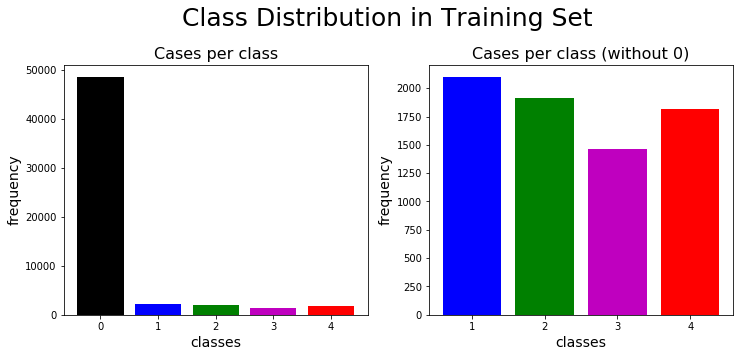

In [0]:
class_freq = summary_counts_df['train'].values
fig = plt.figure(figsize=(12,5))
ax0 = fig.add_subplot(121)
ax0.bar(range(0,5),class_freq,color=['k','b','g','m','r'])
ax0.set_xlabel('classes', fontsize=14)
ax0.set_ylabel('frequency', fontsize=14)
ax0.set_title('Cases per class', fontsize=16)
ax1 = fig.add_subplot(122)
ax1.bar(range(1,5),class_freq[1::],color=['b','g','m','r'])
ax1.set_xlabel('classes', fontsize=14)
ax1.set_ylabel('frequency', fontsize=14)
ax1.set_title('Cases per class (without 0)', fontsize=16)
ax1.set_xticks(range(1,5));
plt.suptitle('Class Distribution in Training Set',fontsize=25)
plt.subplots_adjust(top=0.82)


The normal type (class 0) is dominant in the dataset with the four other labels almost uniformly distributed. We will therefore need to address the imbalance between the negative (normal) and positive (i.e. suspicious-growth) classes when fitting classifiers to the training set.

**Randomly-selected instances of each class**

In [0]:
'''FUNCTION TO PLOT IMAGE FROM ID'''
def load_image(image_id,show=False):
    '''
    -----------------------------------------------------------------------
    Function to load image from file location and normalize between 0 and 1
    -----------------------------------------------------------------------
    Param[in] image_id .. double of image id
    Param[out] path .. string of image location
    '''
    image = Image.open('./images/'+image_id+'.png')
    image = list(image.getdata())
    image = np.array(image)
    image = np.reshape(image,(299,299,1)) #We know the shape of all images are 299x299
    if show:
        plt.imshow(image[:,:,0],cmap='gray')
        plt.axis('off')
    return image/255.

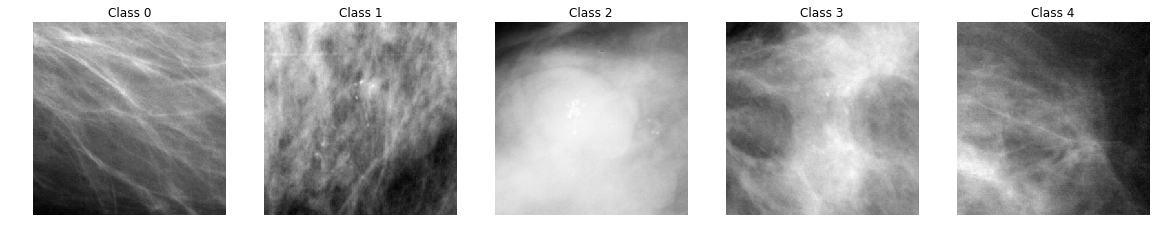

In [0]:
'''PLOT 5 CLASSES OF IMAGES '''

# Subset the dataframe by class
train_label_0_df = train_label_df[train_label_df['class']==0]
train_label_1_df = train_label_df[train_label_df['class']==1]
train_label_2_df = train_label_df[train_label_df['class']==2]
train_label_3_df = train_label_df[train_label_df['class']==3]
train_label_4_df = train_label_df[train_label_df['class']==4]

#Get random ids
id_0 = np.random.choice(train_label_0_df['id'])
id_1 = np.random.choice(train_label_1_df['id'])
id_2 = np.random.choice(train_label_2_df['id'])
id_3 = np.random.choice(train_label_3_df['id'])
id_4 = np.random.choice(train_label_4_df['id'])

#Plot images
fig = plt.figure(figsize=(20,20))
ax0 = fig.add_subplot(1,5,1)
load_image(id_0,True);
ax0.set_title('Class 0')
ax1 = fig.add_subplot(1,5,2)
load_image(id_1,True);
ax1.set_title('Class 1')
ax2 = fig.add_subplot(1,5,3)
load_image(id_2,True);
ax2.set_title('Class 2')
ax3 = fig.add_subplot(1,5,4)
load_image(id_3,True);
ax3.set_title('Class 3')
ax4 = fig.add_subplot(1,5,5)
load_image(id_4,True);
ax4.set_title('Class 4');

The images above are the ROI of original scans. Without medical knowledge, it seems difficult to distinguish the different classes based on the above images. However, these are random images selected from the dataset. We also plotted the mean image for each class, illustrated below, to get a sense of whether the spatial distribution of light differs systematically by class:

0
1
2
3
4


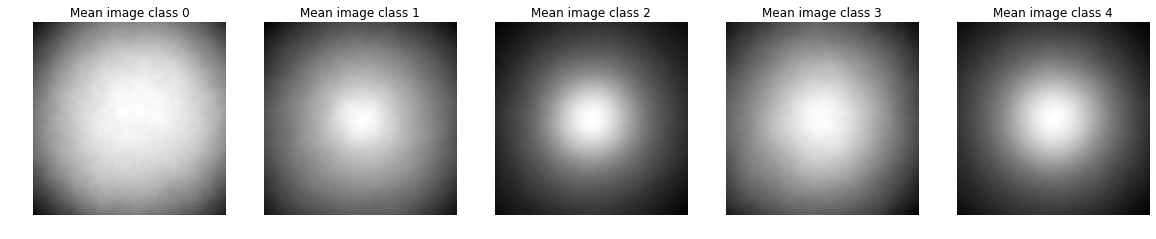

In [0]:
'''PLOT MEAN IMAGE OF EACH CLASS'''
fig = plt.figure(figsize=(20,20))
axs = []
im_mean = []
for i in range(5):
    axs.append(fig.add_subplot(1,5,i+1))
    im_mean.append(np.zeros((299,299)))
    df_temp = train_label_df[train_label_df['class']==i]
    n_image_temp = df_temp.shape[0]
    for j in range(n_image_temp):
        im_temp = load_image(df_temp['id'].values[j])
        im_mean[i]+=im_temp[:,:,0]
    im_mean[i] = im_mean[i]/n_image_temp
    axs[i].imshow(im_mean[i],cmap='gray')
    axs[i].axis('off')
    axs[i].set_title('Mean image class '+str(i))

Since the images were centered at the centerpoint of the growth (calcification or mass), and growths appear as light patches in the image, the average spread of the pixel/light intensity around the image center gives a general sense of whether the size of the growth differs systematically by class. 

We see that calcifications (corresponding to classes 1 and 3) are generally more "diffuse" than masses (classes 2 and 4), though that there is not a clear distinction between benign and malignant growths of either type.

**Distribution of pixel intensity by class**

In [0]:
'''CALCULATE LIGHT AMOUNT IN EACH IMAGE'''
light_amount=[]
for i in range(5):
    light_amount.append([])
    df_temp = train_label_df[train_label_df['class']==i]
    n_image_temp = df_temp.shape[0]
    for j in range(n_image_temp):
        im_temp = load_image(df_temp['id'].values[j])
        light_amount[i].append(np.sum(im_temp))

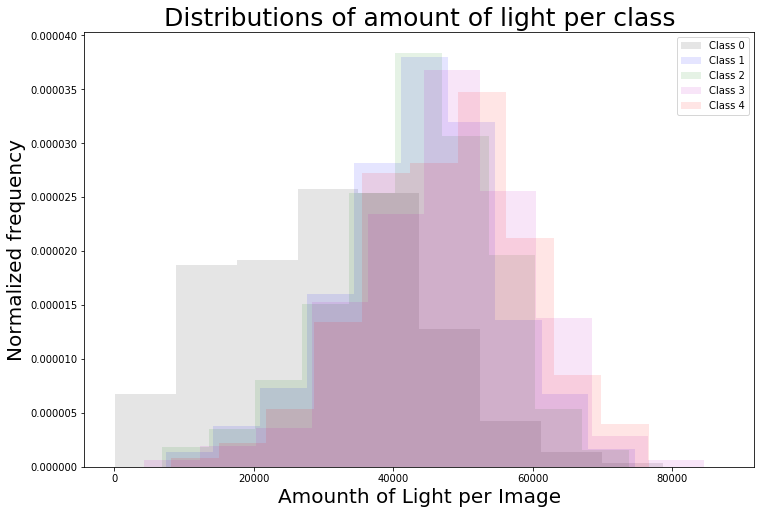

In [0]:
'''PLOT HISTOGRAMS'''
fig = plt.figure(figsize=(12,8))
plt.hist(light_amount[0],color='k',alpha=0.1,label='Class 0',density=True)
plt.hist(light_amount[1],color='b',alpha=0.1,label='Class 1',density=True)
plt.hist(light_amount[2],color='g',alpha=0.1,label='Class 2',density=True)
plt.hist(light_amount[3],color='m',alpha=0.1,label='Class 3',density=True)
plt.hist(light_amount[4],color='r',alpha=0.1,label='Class 4',density=True);
plt.xlabel('Amounth of Light per Image',fontsize=20)
plt.ylabel('Normalized frequency',fontsize=20)
plt.title('Distributions of amount of light per class',fontsize=25)
plt.legend();

From the distributions above, we see that for higher class labels, the mean of the distribution is shifted to the right and the images contain more light. The left tail of the distribution for class $0$ could be an indication of un-cleaned images with text labels or black backgrounds. 

## 6. References

[1] Eric A. Scuccimarra, DDSM dataset, Version 10. Accessed at https://github.com/escuccim/mias-mammography

[2]  Scuccimarra, Eric A. “ConvNets for Detecting Abnormalities in DDSM Mammograms.” Medium, 21 May 2018, medium.com/@ericscuccimarra/convnets-for-classifying-ddsm-mammograms-1739e0fe8028.

[3] Arzav Jain, Daniel Levy. "DeepMammo: Breast Mass Classification using Deep Convolutional Neural Networks" Accessed at http://cs231n.stanford.edu/reports/2016/pdfs/306_Report.pdf)

[4] Heinrich Jiang, Been Kim, Melody Y. Guan, Maya Gupta. "To Trust Or Not To Trust A Classifier". Accessed at https://arxiv.org/abs/1805.11783.

[5] Aditya Khosla, Tinghui Zhou, Tomasz Malisiewicz, Alexei A. Efros, Antonio Torralba. "Undoing the Damage of Dataset Bias". European Conference on Computer Vision (ECCV), 2012. Accessed at http://undoingbias.csail.mit.edu.

[6] Pengcheng Xi, Chang Shu, Rafik Goubran. "Abnormality Detection in Mammography using Deep Convolutional Neural Networks." (March 5, 2018). Accessed at https://arxiv.org/pdf/1803.01906.pdf.

[7] Shayan Shams, Richard Platania, Jian Zhang, Joohyun Kim, Kisung Lee, Seung-Jong Park. "Deep Generative Breast Cancer Screening and Diagnosis." (Sept 26, 2018). Accessed at https://link.springer.com/chapter/10.1007/978-3-030-00934-2_95.




